# CAPM analysis
## Capital Asset Pricing Model 
The **Capital Asset Pricing Model (CAPM)** describes the relationship between systematic risk and expected return for assets. The goal of the CAPM formula is to evaluate whether a stock is fairly valued when its risk and the time value of money are compared to its expected return. More: https://www.investopedia.com/terms/c/capm.asp

The formula for obtaining the expected return of an asset given its risk is as follows:

$$ E[R_i] = R_f + \beta_i ( E[R_m] - R_f ),  $$

where:

$E[R_i] - \text{expected return of investment}$

$R_f - \text{risk-free rate}$

$\beta_i - \text{beta of the investment}$

$(E[R_m] - R_f) - \text{market risk premium}$

## Beta coefficient

Beta coefficient measures the volatility of an individual stock in comparison to the unsystematic risk of the entire market. More: https://www.investopedia.com/terms/b/beta.asp

$$\beta_i = \frac{Covariance(R_e, R_m)}{Variance(R_m)},$$

where:

$R_e - \text{the return on an individual stock}$

$R_m - \text{the return on the overall market}$

$Covariance - \text{how changes in a stock’s returns are related to changes in the market’s returns}$

$Variance - \text{how far the market’s data points spreadout from their average value}$




## Adjusted closing price

Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock and is often used when examining historical returns or performing a detailed analysis of historical returns. More: https://www.investopedia.com/terms/a/adjusted_closing_price.asp

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from plot_utilities import matplotlib_nikita_style
matplotlib_nikita_style()

[*********************100%***********************]  4 of 4 completed


Text(0.5, 1.0, 'Adusted closing price')

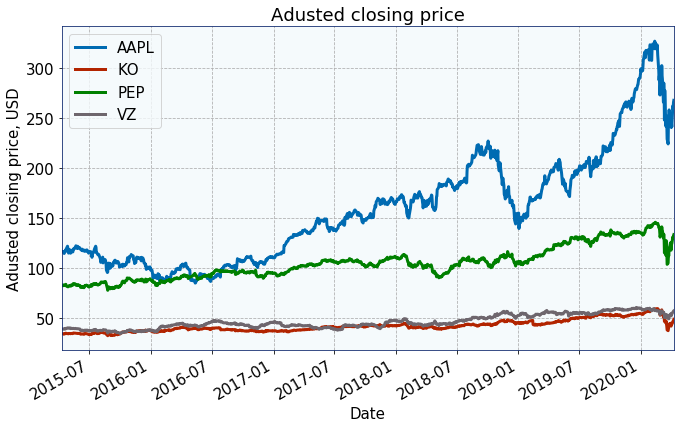

In [2]:
# Define the ticker list
tickers = ['AAPL', 'VZ', 'KO', 'PEP']

# Fetch the data
data = yf.download(tickers, period="5y")
daily_close = data['Adj Close']
                   
# Plot the adjusted closing price
daily_close.plot()
plt.ylabel('Adusted closing price, USD')
plt.xlabel('Date')
plt.title('Adusted closing price')

## Daily return
The return over a single period of any length of time is:
$$r={\frac {V_{f}-V_{i}}{V_{i}}}$$

where:

$V_{f} - \text{final value, including dividends and interest}$

$V_{i} - \text{initial value}$

## Cumulative return
A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the period of time involved. The cumulative return can be calculated as follows:

$$R_i = (1+r_i)R_{i-1},$$

where $R_i$ is cumulative return and $r_i$ is daily return.

Text(0.5, 1.0, 'Daily cumulative return')

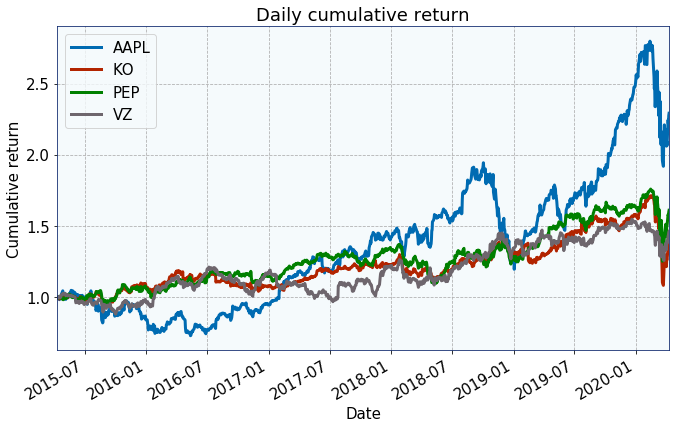

In [3]:
# Daily percentage return
daily_pct_change = daily_close.pct_change()

# Plot the cumulative daily return
cum_daily_return = (1 + (daily_pct_change)).cumprod()
cum_daily_return.plot()
plt.ylabel('Cumulative return')
plt.xlabel('Date')
plt.title('Daily cumulative return')

## Volatility

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is measured as either the standard deviation or variance between returns from that same security or market index:

$$ V = \sigma_r \sqrt T$$

where:

$\sigma_r  = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}- \text{standard deviation,} x_i  - \text{daily return}$

$T - \text{time period}$

More: https://www.investopedia.com/terms/v/volatility.asp

Text(0.5, 1.0, 'Volatility')

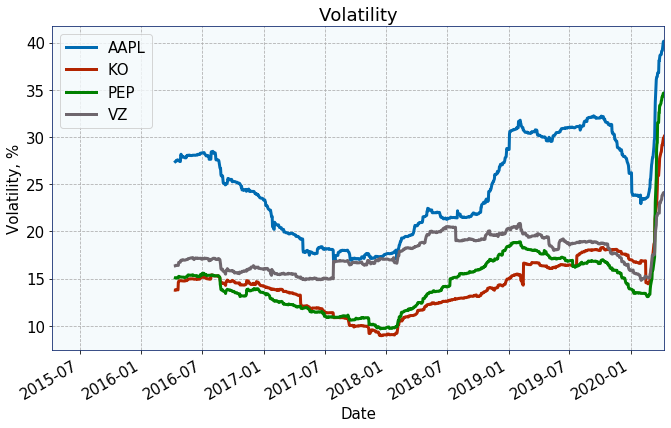

In [4]:
# Plot volatility
time_period = 252
volatility = daily_pct_change.rolling(time_period).std() * np.sqrt(time_period) * 100
volatility.plot()
plt.ylabel('Volatility, %')
plt.xlabel('Date')
plt.title('Volatility')

## Linear regression
Regression is a statistical method that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

The general form of simple linear regression and multiple linear regression:

-   **Simple linear regression:**  $Y = \alpha + bX + \epsilon$
-   **Multiple linear regression:**  $Y = \alpha + \beta_1X_1 +  \beta_2X_2  + \beta_3X_3  + ... + \beta_tX_t  + \epsilon$

where:

$Y - \text{observed values (dependent variables)}$

$X - \text{input variables (independent variables)}$

$\alpha - \text{intercept}$

$\beta - \text{slope}$

$\epsilon - \text{disturbance term}$

More: [https://en.wikipedia.org/wiki/Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  AAPL        ^GSPC
Date                               
2019-12-31  292.954712  3230.780029
2020-01-31  308.777191  3225.520020
2020-02-28  273.359985  2954.219971
2020-03-31  254.289993  2584.590088
2020-04-30  267.989990  2789.820068
                AAPL     ^GSPC
Date                          
2019-12-31  0.098784  0.028590
2020-01-31  0.054010 -0.001628
2020-02-28 -0.114701 -0.084110
2020-03-31 -0.069761 -0.125119
2020-04-30  0.053875  0.079405
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     30.84
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.33e-0

/Users/tafintse/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


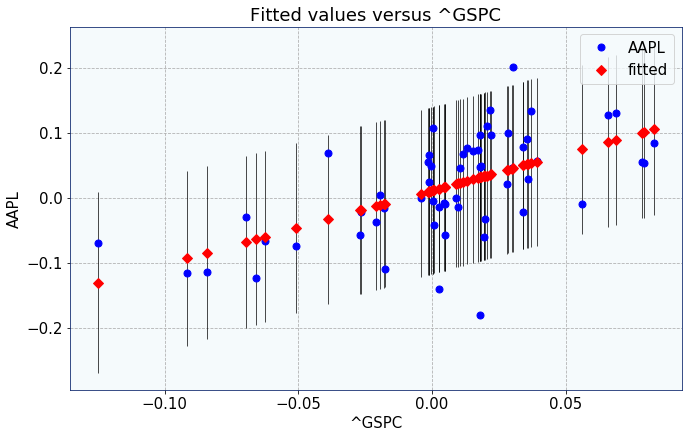

In [5]:
# Fetch AAPL and S&P 500 index
data = yf.download('AAPL', period="5y")
sp_500 = yf.download('^GSPC', period="5y")

# By month
data = data.resample('BM').apply(lambda x: x[-1])
sp_500 = sp_500.resample('BM').apply(lambda x: x[-1])

# Joining the adjusted closing prices of the two datasets 
monthly_return = pd.concat([data['Adj Close'], sp_500['Adj Close']], axis=1)
monthly_return.columns = ['AAPL', '^GSPC']

print(monthly_return.tail())

# Calculate monthly returns
monthly_returns = monthly_return.pct_change(1)

# Drop missing rows
monthly_returns = monthly_returns.dropna(axis=0)  

print(monthly_returns.tail())

# Split dependent and independent variable
X = monthly_returns['^GSPC']
y = monthly_returns['AAPL']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Regression model 
model_aapl_sp_500 = sm.OLS(y, X1)

# Fit the model and print results
results_aapl_sp_500 = model_aapl_sp_500.fit()
print(results_aapl_sp_500.summary())

# Plot the fitted values versus the independent variable
fig, ax = plt.subplots(figsize=(10, 6))
fig = sm.graphics.plot_fit(results_aapl_sp_500, '^GSPC', ax=ax)